### Assignment 2
Submitted By: Ishan Ghosh, B170473CS, CSE

Write a program to implement Bisecting k-means clustering algorithm by using Iris data set (available in UCI Machine learning repository) and find the followings:

i)Clusters of the Iris data set (final clustering solution). 

ii)Sum of the Intra-Cluster Distances (SICD) or Sum of the Squared Error (SSE) values of the obtained clustering solution. 

iii)Graphical representation of the obtained clusters.

iv)Give 500 runsof theimplemented Bisecting k-means by changing the initial centroids and see the changes in the clustering solution (SICD values).

v)Compare k-means and Bisecting k-means with respect to iteration vs. SICD plot.

In [1]:
import math
import numpy as np
import pandas as pd

class KMeans:
    def __init__(self, k=3, max_iterations=500):
        self.k = k
        self.tolerance = 0.0001
        self.max_iterations = max_iterations
        
    def calc_distance(self, p1, p2):
        sq_dist = 0
        for i in range(len(p1)):
            sq_dist += (p1[i] - p2[i])**2
        return math.sqrt(sq_dist)
    
    def mean(self, cluster):
        sum_val = [0] * (len(cluster[0]))
        for data in cluster:
            sum_val += data
        return sum_val / len(cluster)
    
    def fit(self, data, centroids):
        self.centroids = {}
        for i in range(self.k):
            self.centroids[i] = centroids[i]
        
        self.sicds = []
        for i in range(self.max_iterations):
            self.classes = {}
            self.pred = []
            for i in range(self.k):
                self.classes[i] = []
                
            sicd = 0
            for point in data:
                distances = []
                for centroid in self.centroids:
                    dist = self.calc_distance(point, self.centroids[centroid])
                    distances.append(dist)
                
                cluster = distances.index(min(distances))
                self.pred.append(cluster)
                self.classes[cluster].append(point)
                if cluster > 2 or cluster < 0:
                    raise Exception('Incorrect Cluster')
                
                sicd += (min(distances))**2
            
            self.sicds.append(sicd)
            prev_cent = dict(self.centroids)
            
            for cluster in self.classes:
                self.centroids[cluster] = self.mean(self.classes[cluster])

            
            isOptimal = False
            flag = 0
            for centroid in self.centroids:
                org_centroid = prev_cent[centroid]
                curr_centroid = self.centroids[centroid]
                if (org_centroid == curr_centroid).all():
                    flag += 1
                    
            if flag == self.k:
                isOptimal =True
                    
            if isOptimal:
                break

In [2]:
def flatten_array(points):
    points = np.array(points)
    if len(points.shape) == 1:
        points = np.expand_dims(points, -1)
    return points

def calculate_sse(points):
    sum_val = [0] * (len(points[0]))
    for data in points:
        sum_val += data
    centroid = sum_val / len(points)
    
    errors = 0
    for p in points:
        sq_dist = 0
        for i in range(len(p)):
            sq_dist += (p[i] - centroid[i])**2
        errors += sq_dist
    return errors


def bisecting_kmeans(points, k=3, epochs=100, max_iter=100):
    clusters = [points]
    while len(clusters) < k:
        sse_array = [calculate_sse(c) for c in clusters]
        max_sse_i = sse_array.index(max(sse_array))
        cluster = clusters.pop(max_sse_i)
        
        min_sse = np.inf
        min_clusters = []
        for i in range(epochs):
            kmeans = KMeans(2,500)
            cluster = pd.DataFrame(cluster)
            centroids = cluster.sample(n=2)
            kmeans.fit(cluster.values, centroids.values)
            two_clusters = []
            for c in kmeans.classes:
                two_clusters.append(flatten_array(kmeans.classes[c]))
            if kmeans.sicds[-1] < min_sse:
                min_sse = kmeans.sicds[-1]
                min_clusters = two_clusters
            del kmeans
        clusters.extend(min_clusters)
    return clusters

In [3]:
from sklearn import datasets
from sklearn.utils import shuffle

iris = datasets.load_iris()
X, y = shuffle(iris.data, iris.target)#, random_state=1126)
X = pd.DataFrame(X, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
y = pd.DataFrame(y, columns=['Target'])

In [4]:
from matplotlib import pyplot as plt

def visualize_clusters(clusters, r, c, label):
    colors = np.array(['red', 'green', 'blue'])
    i = 0
    plt.figure()
    for cluster in clusters:
        points = flatten_array(cluster)
        if points.shape[1] < 3:
            points = np.hstack([points, np.zeros_like(points)])
        plt.plot(points[:,r], points[:,c], 'o', c=colors[i])
        i = i+1
    plt.xlabel(label+" Length")
    plt.ylabel(label+" Width")
    plt.title("Clustering")
    plt.show()

In [5]:
clusters = bisecting_kmeans(points=X.values, epochs=100, k=3, max_iter=500)

In [6]:
i = 1
for c in clusters:
    print('cluster'+str(i)+':')
    print(c)
    print()
    i += 1

cluster1:
[[5.4 3.7 1.5 0.2]
 [5.7 3.8 1.7 0.3]
 [4.8 3.4 1.9 0.2]
 [5.4 3.4 1.7 0.2]
 [4.9 3.1 1.5 0.2]
 [5.4 3.9 1.7 0.4]
 [4.9 2.4 3.3 1. ]
 [5.1 3.4 1.5 0.2]
 [5.7 4.4 1.5 0.4]
 [5.1 3.5 1.4 0.2]
 [5.  3.4 1.6 0.4]
 [5.4 3.4 1.5 0.4]
 [5.2 3.4 1.4 0.2]
 [5.1 3.7 1.5 0.4]
 [5.2 3.5 1.5 0.2]
 [5.  3.4 1.5 0.2]
 [5.5 3.5 1.3 0.2]
 [5.1 3.8 1.9 0.4]
 [4.6 3.1 1.5 0.2]
 [5.5 4.2 1.4 0.2]
 [4.8 3.1 1.6 0.2]
 [4.6 3.6 1.  0.2]
 [5.2 4.1 1.5 0.1]
 [4.6 3.4 1.4 0.3]
 [5.8 4.  1.2 0.2]
 [4.7 3.2 1.3 0.2]
 [4.7 3.2 1.6 0.2]
 [4.4 2.9 1.4 0.2]
 [4.8 3.4 1.6 0.2]
 [4.9 3.1 1.5 0.1]
 [5.3 3.7 1.5 0.2]
 [5.  3.  1.6 0.2]
 [4.8 3.  1.4 0.1]
 [5.  3.2 1.2 0.2]
 [4.4 3.  1.3 0.2]
 [4.4 3.2 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [5.  3.6 1.4 0.2]
 [5.  2.3 3.3 1. ]
 [5.1 3.3 1.7 0.5]
 [5.1 2.5 3.  1.1]
 [4.8 3.  1.4 0.3]
 [5.  3.3 1.4 0.2]
 [4.5 2.3 1.3 0.3]
 [4.9 3.  1.4 0.2]
 [5.4 3.9 1.3 0.4]
 [4.3 3.  1.1 0.1]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.5 0.3]
 [5.1 3.8 1.6 0.2]
 [5.  3.5 1.3 0.3]
 [5.1 3.5 1.4 0.3]
 [

In [7]:
sse = 0
for c in clusters:
    sse += calculate_sse(c)
print("SICD:", sse)

SICD: 84.20375254573915


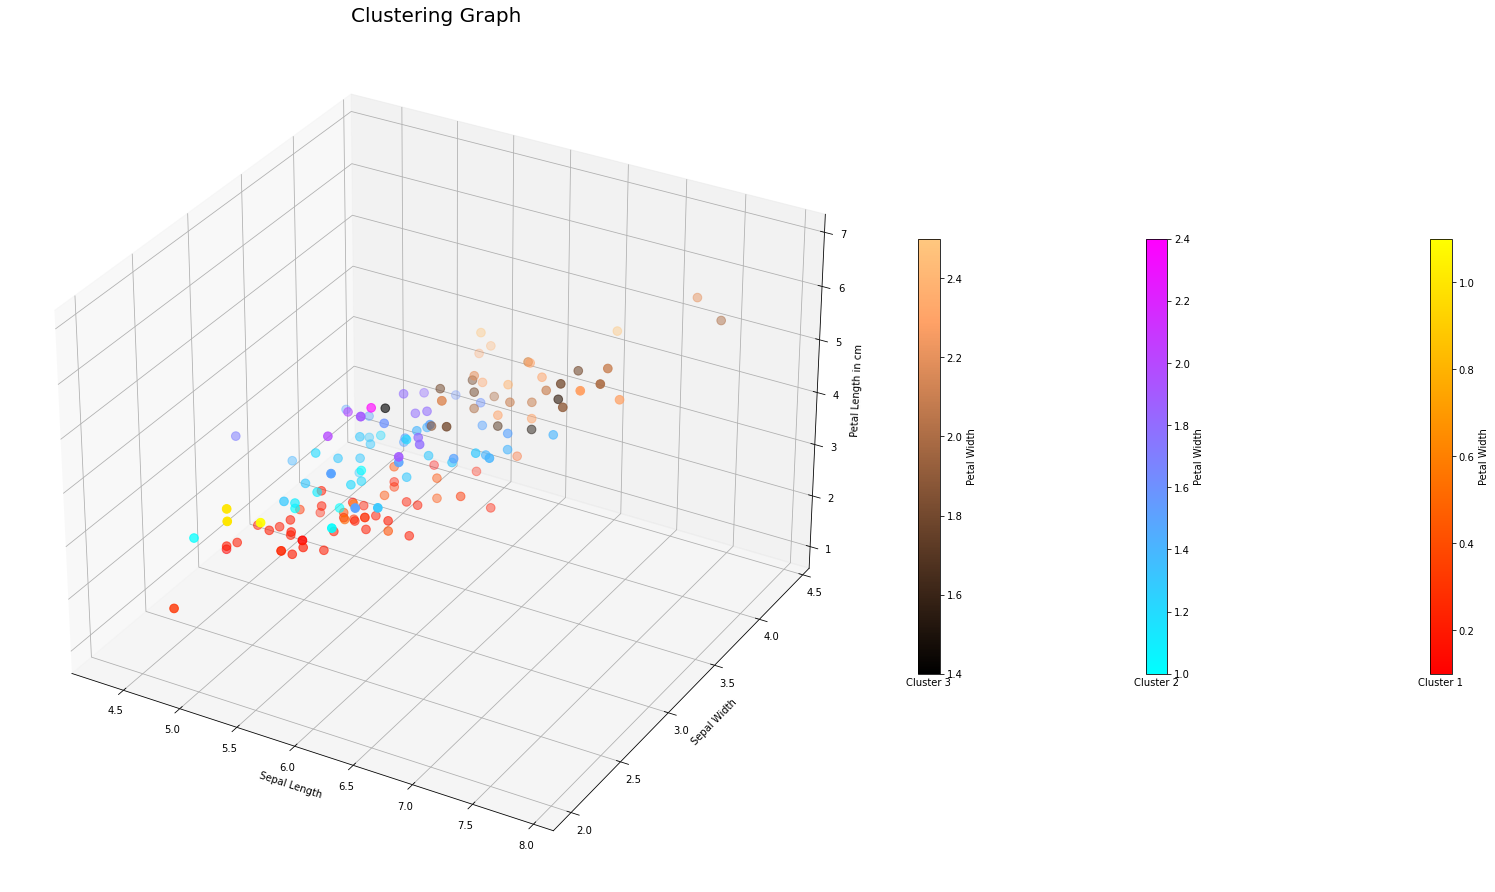

In [8]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

i = 0
fig = plt.figure(figsize=(30, 40))
ax = fig.add_subplot(111, projection='3d')

x = clusters[0][:,0]
y = clusters[0][:,1]
z = clusters[0][:,2]
c = clusters[0][:,3]
img0 = ax.scatter(x, y, z, c=c, s=75, cmap=plt.autumn())

x = clusters[1][:,0]
y = clusters[1][:,1]
z = clusters[1][:,2]
c = clusters[1][:,3]
img1 = ax.scatter(x, y, z, c=c, s=75, cmap=plt.cool())

x = clusters[2][:,0]
y = clusters[2][:,1]
z = clusters[2][:,2]
c = clusters[2][:,3]
img2 = ax.scatter(x, y, z, c=c, s=75, cmap=plt.copper())

cbar = fig.colorbar(img0, shrink=0.2)
cbar.ax.set_ylabel('Petal Width')
cbar.ax.set_xlabel('Cluster 1')
cbar = fig.colorbar(img1, shrink=0.2)
cbar.ax.set_ylabel('Petal Width')
cbar.ax.set_xlabel('Cluster 2')
cbar = fig.colorbar(img2, shrink=0.2)
cbar.ax.set_ylabel('Petal Width')
cbar.ax.set_xlabel('Cluster 3')

ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length in cm')

    
plt.title('Clustering Graph', fontsize=20)
plt.show()

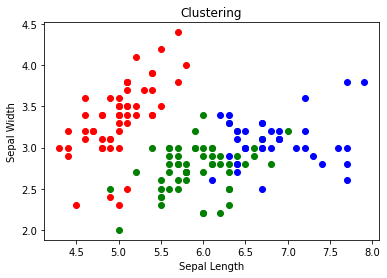

In [9]:
visualize_clusters(clusters, 0, 1, 'Sepal')

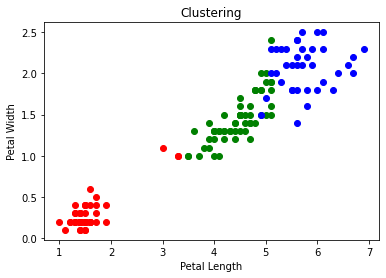

In [10]:
visualize_clusters(clusters, 2, 3, 'Petal')

In [11]:
sicds = []

In [12]:
run_sicds = []
for i in range(100):
    clusters = bisecting_kmeans(points=X.values, epochs=10, k=3, max_iter=500)
    sse = 0
    for c in clusters:
        sse += calculate_sse(c)
    print(sse)
    run_sicds.append(sse)
    del clusters
sicds.extend(run_sicds)

84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.2037525

In [13]:
run_sicds = []
for i in range(100):
    clusters = bisecting_kmeans(points=X.values, epochs=10, k=3, max_iter=500)
    sse = 0
    for c in clusters:
        sse += calculate_sse(c)
    print(sse)
    run_sicds.append(sse)
    del clusters
sicds.extend(run_sicds)

84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.2037525

In [14]:
run_sicds = []
for i in range(100):
    clusters = bisecting_kmeans(points=X.values, epochs=10, k=3, max_iter=500)
    sse = 0
    for c in clusters:
        sse += calculate_sse(c)
    print(sse)
    run_sicds.append(sse)
    del clusters
sicds.extend(run_sicds)

84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.2037525

In [15]:
run_sicds = []
for i in range(100):
    clusters = bisecting_kmeans(points=X.values, epochs=10, k=3, max_iter=500)
    sse = 0
    for c in clusters:
        sse += calculate_sse(c)
    print(sse)
    run_sicds.append(sse)
    del clusters
sicds.extend(run_sicds)

84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.2037525

In [16]:
run_sicds = []
for i in range(100):
    clusters = bisecting_kmeans(points=X.values, epochs=10, k=3, max_iter=500)
    sse = 0
    for c in clusters:
        sse += calculate_sse(c)
    print(sse)
    run_sicds.append(sse)
    del clusters
sicds.extend(run_sicds)

84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.20375254573915
84.2037525

In [24]:
all_sicd = []
for i in range(0, 100):
    km = KMeans(3, 500)
    centroids = X.sample(n=3)
    km.fit(X.values, centroids.values)
    all_sicd.append(km.sicds[-1])
    del km

In [25]:
for i in range(0, 100):
    km = KMeans(3, 500)
    centroids = X.sample(n=3)
    km.fit(X.values, centroids.values)
    all_sicd.append(km.sicds[-1])
    del km

In [26]:
for i in range(0, 100):
    km = KMeans(3, 500)
    centroids = X.sample(n=3)
    km.fit(X.values, centroids.values)
    all_sicd.append(km.sicds[-1])
    del km

In [27]:
for i in range(0, 100):
    km = KMeans(3, 500)
    centroids = X.sample(n=3)
    km.fit(X.values, centroids.values)
    all_sicd.append(km.sicds[-1])
    del km

In [28]:
for i in range(0, 100):
    km = KMeans(3, 500)
    centroids = X.sample(n=3)
    km.fit(X.values, centroids.values)
    all_sicd.append(km.sicds[-1])
    del km

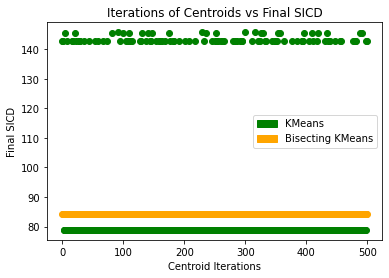

In [36]:
import matplotlib.patches as mpatches

green_patch = mpatches.Patch(color='green', label='KMeans')
orange_patch = mpatches.Patch(color='orange', label='Bisecting KMeans')

x = [i for i in range(500)]
plt.scatter(x, all_sicd, c='green')
plt.scatter(x, sicds, c='orange')
plt.xlabel('Centroid Iterations')
plt.ylabel('Final SICD')
plt.legend(handles=[green_patch, orange_patch])
plt.title('Iterations of Centroids vs Final SICD')
plt.show()

In [37]:
print(len(sicds))

500
